# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score, confusion_matrix, matthews_corrcoef, precision_score, recall_score, classification_report
from sklearn.metrics import explained_variance_score, mean_squared_error, accuracy_score
from sklearn.utils import shuffle

from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

# Pre-processing Data

In [2]:
data = pd.read_csv("biodegradable_a.csv")
data


,SpMax_L,J_Dz(e),nHM,F01,F04,NssssC,nCb,C,nCp,nO,...,C_026,F02_CN,nHDon,SpMax_B,Psi_i_A,nN,SM6_B,nArCOOR,nX,Biodegradable
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,31.400000,2.0,0.0,...,0.0,0.0,0.0,2.949000,1.591000,0.0,7.253000,0.0,0.0,RB
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,30.800000,1.0,1.0,...,0.0,0.0,0.0,3.315000,1.967000,0.0,7.257000,0.0,0.0,RB
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,26.700000,2.0,4.0,...,0.0,0.0,1.0,NaN,2.417000,0.0,7.601000,0.0,0.0,RB
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,20.000000,NaN,2.0,...,0.0,0.0,1.0,NaN,5.000000,0.0,6.690000,0.0,0.0,RB
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,29.400000,2.0,4.0,...,0.0,0.0,0.0,3.351000,2.405000,0.0,8.003000,0.0,NaN,RB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,27.300000,2.0,2.0,...,0.0,0.0,0.0,3.398382,3.241090,0.0,7.406748,0.0,0.0,RB
4560,3.853731,2.747142,0.0,NaN,0.0,0.0,0.0,33.300000,0.0,0.0,...,0.0,0.0,1.0,3.429148,2.719309,0.0,7.511511,0.0,0.0,RB
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,28.422154,2.0,2.0,...,0.0,0.0,0.0,3.351666,2.729456,0.0,7.699324,0.0,0.0,RB
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,NaN,2.0,3.0,...,0.0,0.0,0.0,NaN,3.059198,0.0,7.908802,0.0,0.0,RB


In [3]:
missing_val=data.isna().sum()

missing_val=(missing_val/data.shape[0])*100

missing_val

SpMax_L           0.000000
J_Dz(e)           0.000000
nHM               0.000000
F01              11.283961
F04               0.000000
NssssC            0.000000
nCb               0.000000
C                16.805434
nCp              14.702016
nO                0.000000
F03               0.000000
SdssC             0.000000
HyWi_B           10.495180
LOC               0.000000
SM6_L             0.000000
F03_CO            0.942156
Me                9.815951
Mi                0.000000
nN_N              0.000000
nArNO2            0.000000
nCRX3             0.000000
SpPosA_B          0.000000
nCIR             10.736196
B01               0.000000
B03               0.000000
N_073             0.000000
SpMax_A          14.767748
Psi_i_1d          0.000000
B04               0.000000
SdO               4.623138
TI2_L             0.000000
nCrt              5.652936
C_026             0.000000
F02_CN            0.000000
nHDon             0.000000
SpMax_B          29.754601
Psi_i_A          10.078878
n

In [4]:
# number of missing values
print(data.isnull().sum().sum())

7056


In [5]:
data_v1=data.drop(["SpMax_B", "C","nCp", "nX","SpMax_A","F01","HyWi_B", "nCIR", "Psi_i_A", "Me"], axis=1)

cols=[6, 13, 14, 17, 18, 19, 21, 25, 27, 28, 30]

# Correlacao -> cols=[12, 2, 21, 28, 23, 9, 14]

# Sequential feature sele -> cols=[ 0, 2, 4, 14, 16, 18, 22, 24, 26, 28, 31]

#   new_data=data_v1[data_v1.columns[cols]]

new_data=data_v1.drop(data_v1.columns[cols], axis=1)


In [6]:
range_ft=[]

for i in new_data.columns:
    
    minimum=min(new_data[i])
    maximum=max(new_data[i])
    to_add=[minimum, maximum]
    
    range_ft.append(to_add)
range_ft

[[2.0, 6.496],
 [0.8039, 9.1775],
 [0.0, 12.0],
 [0.0, 36.0],
 [0.0, 13.0],
 [0.0, 18.0],
 [0.0, 44.0],
 [-5.256, 4.7219999999999995],
 [0.0, 4.4910000000000005],
 [4.1739999999999995, 12.609000000000002],
 [0.0, 40.0],
 [1.022, 1.3769999999999998],
 [0.0, 3.0],
 [0.863, 1.641],
 [-1.099, 1.073],
 [0.0, 67.469],
 [0.444, 17.537],
 [0.0, 8.0],
 [0.0, 18.0],
 [4.917, 14.7],
 ['NRB', 'RB']]

In [7]:
datax=new_data.drop(["Biodegradable"],axis=1)
#datax.insert(len(datax), )

for i in datax.columns:
    Column_Val=0
    
    for j in range(len(datax[i])):
        
        if not pd.isna(datax[i][j]):
            a = str(datax[i][j])
            valueAfterPoint = a.split('.')[1]
            Column_Val +=float(valueAfterPoint)
        
    if Column_Val==0: 
        rep_Val=datax[i].mode()
        
        for j in range(len(datax[i])):
            if pd.isna(datax[i][j]):
                datax[i][j]=rep_Val
                
    else:
        rep_Val=datax[i].mean()
        
        for j in range(len(datax[i])):
            if pd.isna(datax[i][j]):
                datax[i][j]=rep_Val

datax

,SpMax_L,J_Dz(e),nHM,F04,NssssC,nCb,F03,SdssC,LOC,SM6_L,F03_CO,Mi,nCRX3,SpPosA_B,Psi_i_1d,SdO,TI2_L,nCrt,F02_CN,SM6_B
0,3.919000,2.690900,0.0,0.0,0.0,0.0,0.0,0.000000,2.550000,9.002000,0.0,1.142000,0.0,1.201000,0.011000,0.000000,4.489000,0.0,0.0,7.253000
1,4.170000,2.114400,0.0,0.0,0.0,0.0,0.0,0.000000,1.393000,8.723000,1.0,1.144000,0.0,1.104000,-0.204000,9.449948,1.542000,0.0,0.0,7.257000
2,3.932000,3.251200,0.0,0.0,0.0,0.0,0.0,0.000000,2.585000,9.110000,0.0,1.152000,0.0,1.092000,-0.008000,0.000000,4.891000,0.0,0.0,7.601000
3,3.000000,2.709800,0.0,0.0,0.0,0.0,0.0,0.000000,0.918000,6.594000,0.0,1.167000,0.0,1.024000,1.073000,8.361000,1.333000,0.0,0.0,6.690000
4,4.236000,3.394400,0.0,0.0,0.0,0.0,0.0,-0.271000,2.753000,9.528000,2.0,1.147000,0.0,1.137000,-0.002000,10.348000,5.588000,0.0,0.0,8.003000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4559,4.175650,3.454649,0.0,0.0,0.0,0.0,0.0,-0.308308,1.033666,8.617289,1.0,1.150358,0.0,1.119962,0.336651,9.589615,1.607491,0.0,0.0,7.406748
4560,3.853731,2.747142,0.0,0.0,0.0,0.0,0.0,0.000000,0.983132,8.099587,0.0,1.139562,0.0,1.279367,-0.026500,0.000000,1.611027,0.0,0.0,7.511511
4561,4.294771,3.471226,0.0,0.0,0.0,0.0,0.0,-0.249113,1.913110,9.225643,1.0,1.148667,0.0,1.126555,-0.059892,10.134323,3.182535,0.0,0.0,7.699324
4562,4.560376,3.896390,0.0,0.0,0.0,0.0,0.0,-0.228584,1.804976,9.521317,5.0,1.142303,0.0,1.150385,-0.045804,9.449948,2.895892,0.0,0.0,7.908802


In [8]:
ys = np.array(new_data["Biodegradable"])
y = np.array([int(i=="RB") for i in ys])

In [9]:
X_total, X_IVS_reg, y_total, y_IVS_reg = train_test_split(datax, y, test_size=0.25, random_state=22)

In [10]:
kf = KFold(n_splits=5, shuffle=False)

In [11]:
N,M=X_total.shape
v=np.hstack((y_total.reshape((N,1)), X_total))
v1 = pd.DataFrame(v)
corr = pd.DataFrame(np.corrcoef(v.T))
corr[0]

0     1.000000
1    -0.341247
2     0.017721
3    -0.466193
4    -0.369411
5    -0.285209
6    -0.388747
7    -0.380729
8    -0.089820
9     0.213352
10   -0.281869
11    0.001952
12    0.135529
13   -0.155733
14   -0.343530
15   -0.034513
16    0.073292
17    0.111535
18   -0.198953
19   -0.417339
20   -0.385579
Name: 0, dtype: float64

In [171]:
abs(corr).sort_values(by=[0]).tail(20)[0]


2     0.017721
15    0.034513
16    0.073292
8     0.089820
17    0.111535
12    0.135529
13    0.155733
18    0.198953
9     0.213352
10    0.281869
5     0.285209
1     0.341247
14    0.343530
4     0.369411
7     0.380729
20    0.385579
6     0.388747
19    0.417339
3     0.466193
0     1.000000
Name: 0, dtype: float64

In [172]:
rfr=RandomForestRegressor(random_state=0)
rfr.fit(X_total, y_total)
for i, imp in enumerate(rfr.feature_importances_):
    print("Feature", i, "Importance:", imp )

Feature 0 Importance: 0.015750222167794307
Feature 1 Importance: 0.030933441480291757
Feature 2 Importance: 0.27537573961510714
Feature 3 Importance: 0.06195822644532752
Feature 4 Importance: 0.10933122022654958
Feature 5 Importance: 0.05143295091888968
Feature 6 Importance: 0.0905293756912629
Feature 7 Importance: 0.03251856890404456
Feature 8 Importance: 0.02632780452352773
Feature 9 Importance: 0.02071254836181365
Feature 10 Importance: 0.025074808734098987
Feature 11 Importance: 0.02981392465604215
Feature 12 Importance: 1.411201302114576e-05
Feature 13 Importance: 0.0640244992613263
Feature 14 Importance: 0.019967909160818056
Feature 15 Importance: 0.02232224326724247
Feature 16 Importance: 0.021460625069251234
Feature 17 Importance: 0.03125084551395577
Feature 18 Importance: 0.04822606289720594
Feature 19 Importance: 0.022974871092429006


In [173]:
def naif_model_testing(X_train, X_test, y_train, y_test):
    
    rfr= RandomForestRegressor(n_estimators=100)
    rfr.fit(X_train, y_train)

    dtr= DecisionTreeRegressor(max_depth=5)
    dtr.fit(X_train, y_train)

    lmr=LinearRegression()
    lmr.fit(X_train, y_train)

    rf_preds=rfr.predict(X_test)
    dt_preds=dtr.predict(X_test)
    lr_preds=lmr.predict(X_test)

    print("RVE RFs: %7.4f" % explained_variance_score(y_test, rf_preds))
    print("RVE DTs: %7.4f" % explained_variance_score(y_test, dt_preds))
    print("RVE LRs: %7.4f" % explained_variance_score(y_test, lr_preds))

In [174]:
""""
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

N,M=X_total.shape

#using linear regression for sequential feature selection
lmr=LinearRegression()
sfs = SequentialFeatureSelector(lmr, n_features_to_select=10)
sfs.fit(X_total, y_total)

#get the relevant columns
features=sfs.get_support()
Features_selected =np.arange(M)[features]
print("The features selected are columns: ", Features_selected)

nX_train=sfs.transform(X_total)
nX_test=sfs.transform(X_total)

naif_model_testing(nX_train, nX_test, y_total, y_total)
"""

'"\nfrom sklearn.feature_selection import SequentialFeatureSelector\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.tree import DecisionTreeRegressor\n\nN,M=X_total.shape\n\n#using linear regression for sequential feature selection\nlmr=LinearRegression()\nsfs = SequentialFeatureSelector(lmr, n_features_to_select=10)\nsfs.fit(X_total, y_total)\n\n#get the relevant columns\nfeatures=sfs.get_support()\nFeatures_selected =np.arange(M)[features]\nprint("The features selected are columns: ", Features_selected)\n\nnX_train=sfs.transform(X_total)\nnX_test=sfs.transform(X_total)\n\nnaif_model_testing(nX_train, nX_test, y_total, y_total)\n'

# Model Testing

In [175]:
def print_results(y_test, preds):
    #print(classification_report(y_test, preds))
    print("The Precision is: %7.4f" % precision_score(y_test, preds))
    print("The Recall is: %7.4f" % recall_score(y_test, preds))
    print("The F1 score is: %7.4f" % f1_score(y_test, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(y_test, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(y_test, preds)))

## Decision Tree Classifier

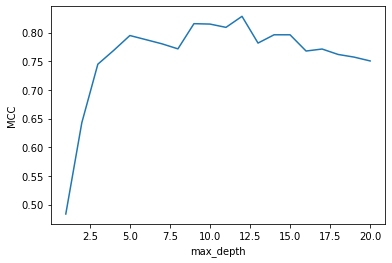

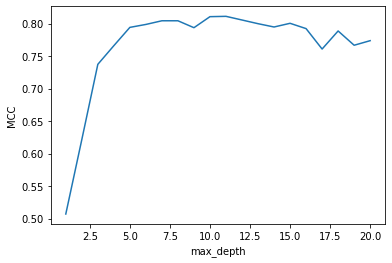

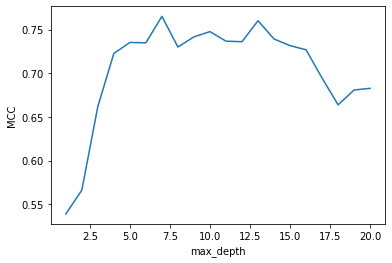

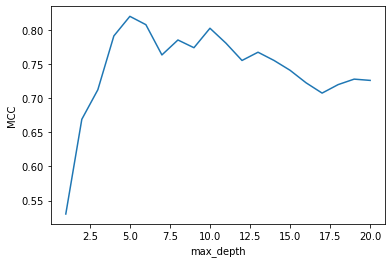

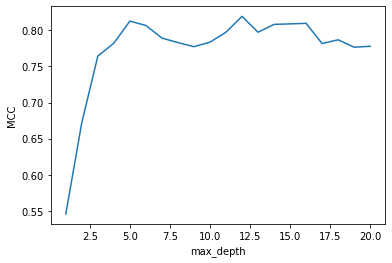

In [115]:
mcc=[]
best_md=[]
maxde=np.arange(1,21)

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    maxde=np.arange(1,21)

    for i in maxde:
        dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=i, random_state=22)
        dt = dt.fit(X_train, y_train)
        #plt.figure(figsize=(10,10))
        #r=tree.plot_tree(dt, filled=True)
        #plt.show()
        preds= dt.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
        
            
    plt.plot(maxde, mcc)
    best_md.append(maxde[np.argmax(mcc)]) 
    plt.xlabel('max_depth')
    plt.ylabel('MCC')
    plt.show()

In [116]:
TRUTH_nfold=None
PREDS_nfold=None

Max_dep=np.mean(best_md)

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    dt = tree.DecisionTreeClassifier(criterion="gini", max_depth=15, random_state=22)
    dt = dt.fit(X_train, y_train)
    #plt.figure(figsize=(10,10))
    #r=tree.plot_tree(dt, filled=True)
    #plt.show()
    preds_tree= dt.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_tree
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_tree))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9547
The Recall is:  0.9745
The F1 score is:  0.9645
The Matthews correlation coefficient is:  0.7749

This is the Confusion Matrix
     0     1
0  433   132
1   73  2785


## Logistic Regression

In [117]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr = LogisticRegression(max_iter=100, random_state=22)
    lr.fit(X_train, y_train)
    preds_lr = lr.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_lr
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_lr))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
        
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9478
The Recall is:  0.9857
The F1 score is:  0.9664
The Matthews correlation coefficient is:  0.7807

This is the Confusion Matrix
     0     1
0  410   155
1   41  2817


#### Probability plot and other parameters

The bias is:  2.337005102178689
The other parameters are: 
	 B01 ->    -0.630
	 B02 ->    -1.768
	 B03 ->    -2.020
	 B04 ->    -0.736
	 B05 ->    -0.700
	 B06 ->    -0.202
	 B07 ->     0.771
	 B08 ->    -0.758
	 B09 ->    -0.766
	 B10 ->    -0.678
Intercept (b0):  2.3370
Slope     (b1): -0.6302
-------------------------


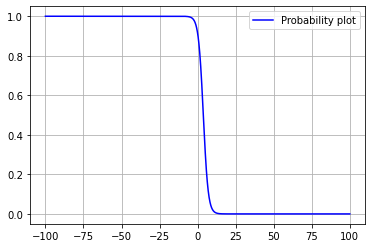

In [118]:
print("The bias is: ",  lr.intercept_[0])
print("The other parameters are: ")
for i, beta in enumerate(lr.coef_[0]):
    print("\t B%02d -> %9.3f"% (i+1, beta))

b0=lr.intercept_[0]
b1=lr.coef_[0][0]
print("Intercept (b0): %7.4f"% b0) 
print("Slope     (b1): %7.4f"% b1) 
print("-------------------------")
x=np.arange(-100, 100, 0.1)
p_sk= 1/(1+np.exp(-(b0+b1*x)))

plt.plot(x, p_sk, c="b", label="Probability plot")
plt.grid()
plt.legend()
plt.show()

## Categorical Naive Bayes

In [119]:
""""
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.preprocessing import MinMaxScaler #fixed import

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    mdl=CategoricalNB(alpha=0.001)

    mdl = mdl.fit(X_train,y_train)

    preds_catNB=mdl.predict(X_test)
    #preds=mdl.predict_proba(X_testsc)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_catNB
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_catNB))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))

print_results(TRUTH_nfold, PREDS_nfold)

"""

'"\nfrom sklearn.naive_bayes import GaussianNB, CategoricalNB\nfrom sklearn.preprocessing import MinMaxScaler #fixed import\n\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import StandardScaler\n\nTRUTH_nfold=None\nPREDS_nfold=None\n\nfor train_index, test_index in kf.split(X_total):\n    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]\n    y_train, y_test = y_total[train_index], y_total[test_index]\n    \n    scaler = MinMaxScaler()\n    X_train = scaler.fit_transform(X_train)\n    X_test = scaler.transform(X_test)\n    \n    mdl=CategoricalNB(alpha=0.001)\n\n    mdl = mdl.fit(X_train,y_train)\n\n    preds_catNB=mdl.predict(X_test)\n    #preds=mdl.predict_proba(X_testsc)\n    \n    if TRUTH_nfold is None:\n        PREDS_nfold=preds_catNB\n        TRUTH_nfold=y_test\n    else:\n        PREDS_nfold=np.hstack((PREDS_nfold, preds_catNB))\n        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))\n\nprint_results(TRUTH_nfold, PREDS_nfold)\n\n'

## Gaussian Naive Bayes

In [120]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)
    preds_gnb = gnb.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_gnb
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_gnb))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9539
The Recall is:  0.9640
The F1 score is:  0.9589
The Matthews correlation coefficient is:  0.7448

This is the Confusion Matrix
     0     1
0  432   133
1  103  2755


## K-Nearest Neighbours

#### Calculate the best k neighbors

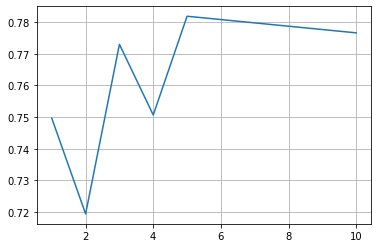

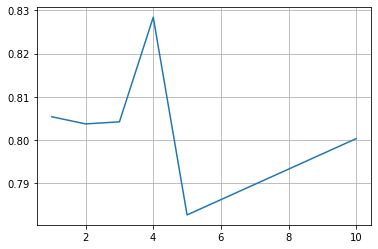

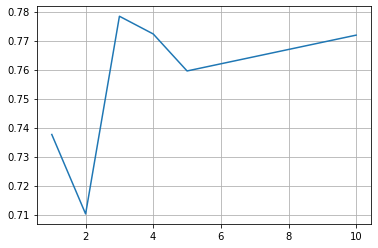

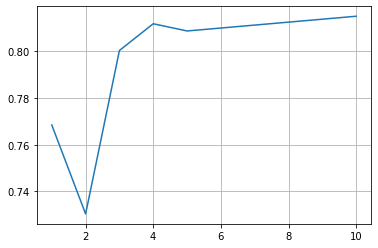

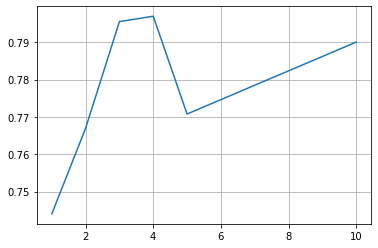

In [121]:
TRUTH_nfold=None
PREDS_nfold=None
ks=np.array([1,2,3,4,5,10])
best_neigh=[]

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for k in range(1, len(ks) + 1):
        knn=KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds=knn.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
    
    plt.plot(ks, mcc)
    best_neigh.append(range(1, len(ks) + 1)[np.argmax(mcc)]) 
    plt.grid()
    plt.show()

In [122]:
TRUTH_nfold=None
PREDS_nfold=None
True_neigh=round(np.mean(best_neigh))


for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
   
    knc = KNeighborsClassifier(n_neighbors=True_neigh, weights="distance")
    knc.fit(X_train, y_train)
    preds_knc = knc.predict(X_test)

    if TRUTH_nfold is None:
        PREDS_nfold=preds_knc
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_knc))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9566
The Recall is:  0.9790
The F1 score is:  0.9677
The Matthews correlation coefficient is:  0.7941

This is the Confusion Matrix
     0     1
0  438   127
1   60  2798


## Support Vector Machine

### Linear Support Vector Classification (SVC)

In [123]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    lsvm_pre = LinearSVC(random_state=22)
    
    lsvm = make_pipeline(StandardScaler(), lsvm_pre)
    
    lsvm.fit(X_train, y_train)
    
    preds = lsvm.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)


C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The Precision is:  0.9458
The Recall is:  0.9888
The F1 score is:  0.9668
The Matthews correlation coefficient is:  0.7825

This is the Confusion Matrix
     0     1
0  403   162
1   32  2826


C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### SVC

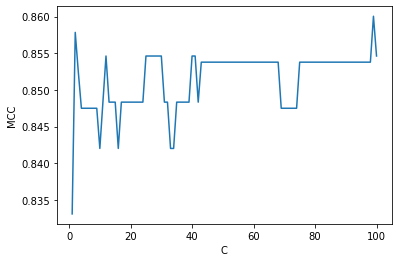

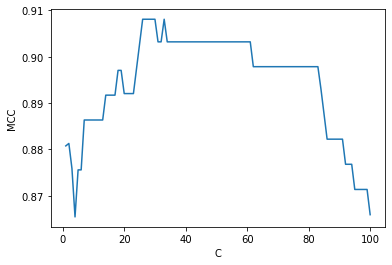

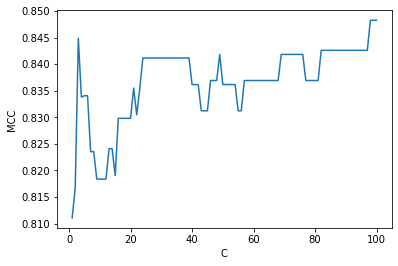

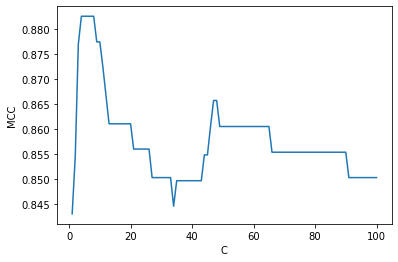

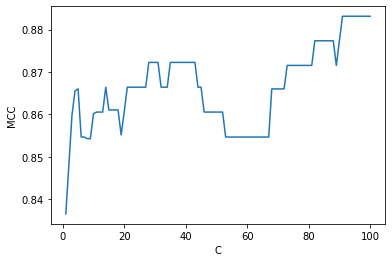

In [176]:
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

TRUTH_nfold=None
PREDS_nfold=None

C_num=np.arange(1,101)
best_c=[]

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in C_num:
    
        svm_pre = SVC(kernel='rbf', C=i, gamma='auto', random_state=22)
        
        svm = make_pipeline(StandardScaler(), svm_pre)
        
        svm.fit(X_train, y_train)
    
        preds = svm.predict(X_test)
    
        mcc.append(matthews_corrcoef(y_test, preds))
    
    plt.plot(C_num, mcc)
    best_c.append(C_num[np.argmax(mcc)]) 
    plt.xlabel('C')
    plt.ylabel('MCC')
    plt.show()

In [177]:
True_C=np.mean(best_c)

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    svm_pre = SVC(kernel='rbf', C=True_C, gamma='auto')
    
    svm = make_pipeline(StandardScaler(), svm_pre)
    
    svm.fit(X_train, y_train)
    
    preds_SVM = svm.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_SVM
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_SVM))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9710
The Recall is:  0.9846
The F1 score is:  0.9778
The Matthews correlation coefficient is:  0.8612

This is the Confusion Matrix
     0     1
0  481    84
1   44  2814


## Bagging Classifier

#### Calculate the best base estimator 

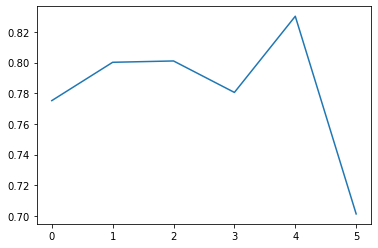

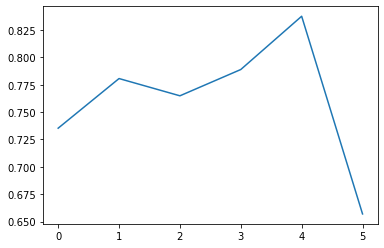

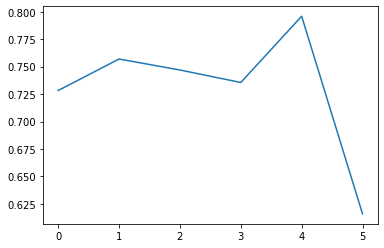

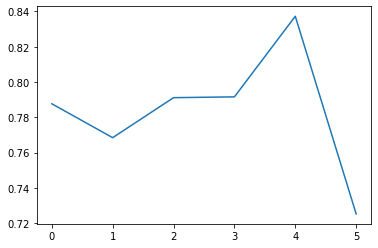

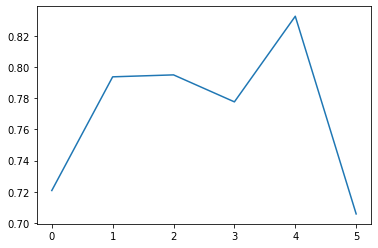

In [127]:
TRUTH_nfold=None
PREDS_nfold=None
estimators = [GaussianNB(), DecisionTreeClassifier(), LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(), SVC()]

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in range(len(estimators)):
        bag = BaggingClassifier(base_estimator=estimators[i], n_estimators=5, random_state=22)
        bag.fit(X_train, y_train)    
        preds = bag.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
    
    plt.plot(range(len(estimators)), mcc)
    
    plt.show()

#### Calculate the best n estimators

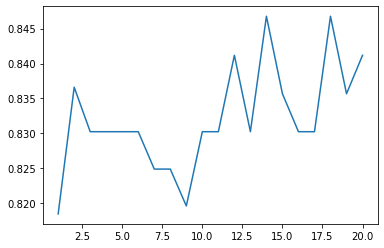

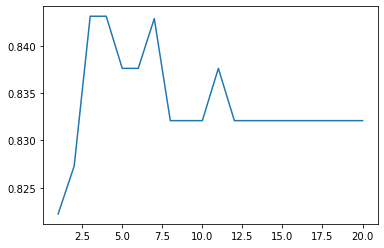

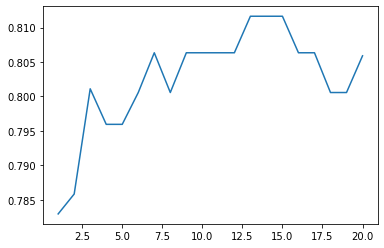

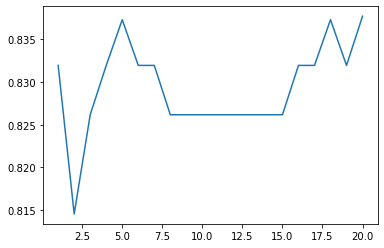

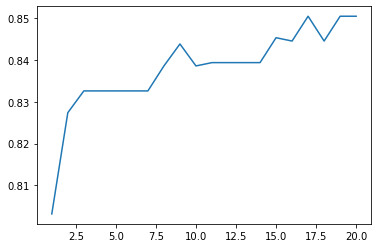

In [128]:
TRUTH_nfold=None
PREDS_nfold=None
estimators = [GaussianNB(), DecisionTreeClassifier(), LogisticRegression(max_iter=1000), KNeighborsClassifier(), RandomForestClassifier(), SVC()]
best_n=[]

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in range(1,21):
        bag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=i, random_state=22)
        bag.fit(X_train, y_train)    
        preds = bag.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
        
    best_n.append(range(1,21)[np.argmax(mcc)])
    plt.plot(range(1,21), mcc)
    plt.show()

In [129]:
TRUTH_nfold=None
PREDS_nfold=None

True_n=round(np.mean(best_n))

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    bag = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=True_n, random_state=22)
    bag.fit(X_train, y_train)
    preds_bag = bag.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_bag
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_bag))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9617
The Recall is:  0.9843
The F1 score is:  0.9729
The Matthews correlation coefficient is:  0.8276

This is the Confusion Matrix
     0     1
0  453   112
1   45  2813


In [130]:
True_n

13

## Random Forest Classifier

#### Calculate the best n estimators

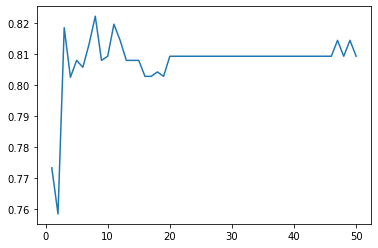

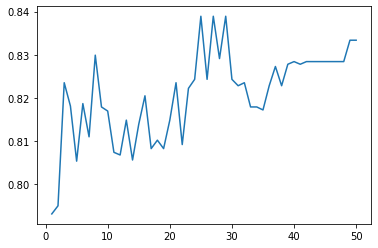

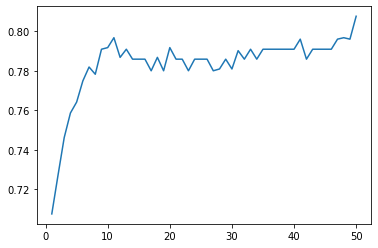

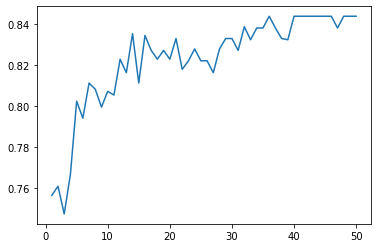

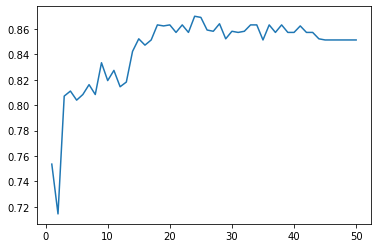

In [131]:
TRUTH_nfold=None
PREDS_nfold=None

best_n=[]

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in range(1,51):
        rfc = RandomForestClassifier(n_estimators=i, random_state=22)
        rfc.fit(X_train, y_train)
        preds = rfc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))

    plt.plot(range(1,51), mcc)
    best_n.append(range(1,51)[np.argmax(mcc)])
    plt.show()

#### Calculate the best max depth

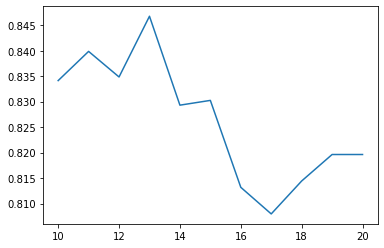

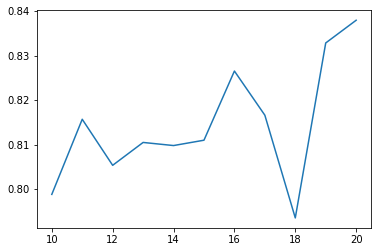

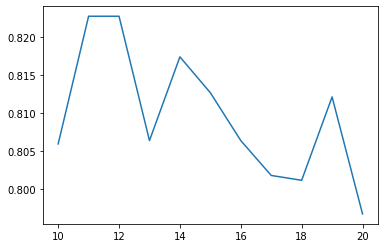

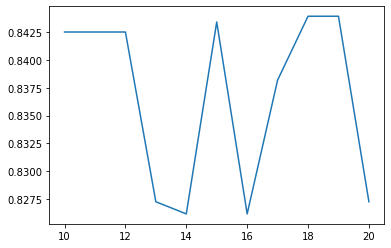

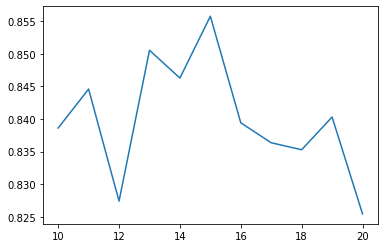

In [132]:
TRUTH_nfold=None
PREDS_nfold=None

maxdep=[]
True_n=round(np.mean(best_n))

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in range(10,21):
        rfc = RandomForestClassifier(n_estimators=True_n, max_depth=i, random_state=22)
        rfc.fit(X_train, y_train)
        preds = rfc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))

    plt.plot(range(10,21), mcc)
    maxdep.append(range(10,21)[np.argmax(mcc)])
    plt.show()

In [133]:
TRUTH_nfold=None
PREDS_nfold=None

True_max=round(np.mean(maxdep))

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    rfc = RandomForestClassifier(n_estimators=True_n, max_depth=True_max, random_state=22)
    rfc.fit(X_train, y_train)
    preds_rfc = rfc.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_rfc
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_rfc))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9633
The Recall is:  0.9832
The F1 score is:  0.9732
The Matthews correlation coefficient is:  0.8303

This is the Confusion Matrix
     0     1
0  458   107
1   48  2810


## Ada Boost Classifier 

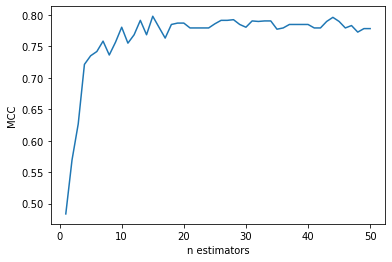

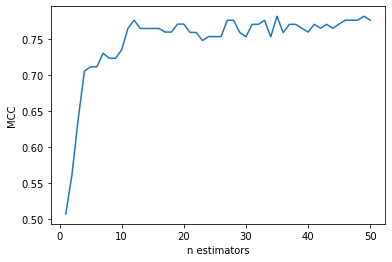

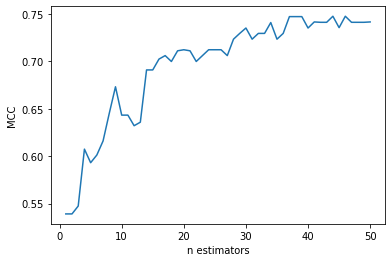

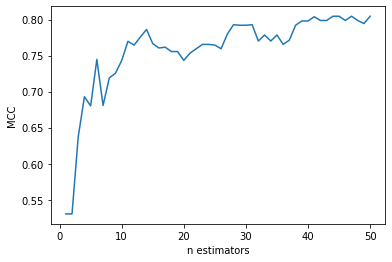

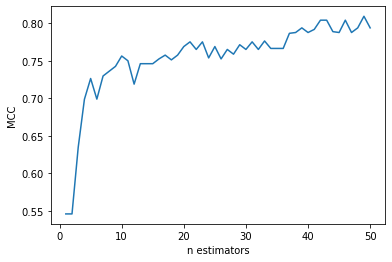

In [134]:
from sklearn.ensemble import AdaBoostClassifier

all_numest=[]

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    numest=np.arange(1,51)

    for i in numest:
        abc = AdaBoostClassifier(n_estimators=i, random_state=22)
        abc.fit(X_train, y_train)
        preds=abc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
        
            
    plt.plot(numest, mcc)
    all_numest.append(numest[np.argmax(mcc)]) 
    plt.xlabel('n estimators')
    plt.ylabel('MCC')
    plt.show()

In [135]:
best_numest=round(np.mean(all_numest))

TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    abc = AdaBoostClassifier(n_estimators=best_numest, random_state=22)
    abc.fit(X_train, y_train)
    
    preds_abc=abc.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_abc
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_abc))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9489
The Recall is:  0.9811
The F1 score is:  0.9647
The Matthews correlation coefficient is:  0.7714

This is the Confusion Matrix
     0     1
0  414   151
1   54  2804


## Gradient Boosting Classifier

#### Calculate the best n estimators

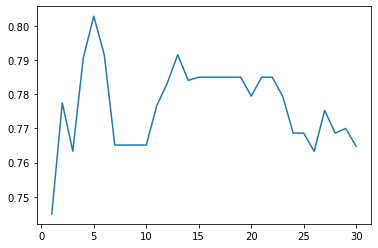

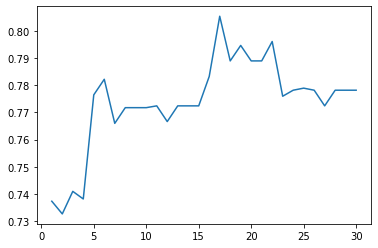

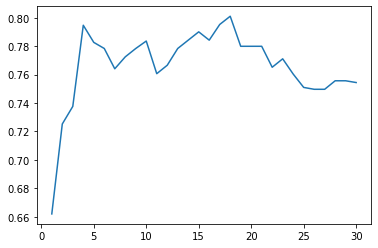

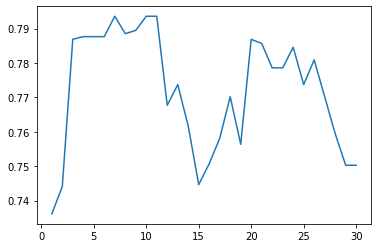

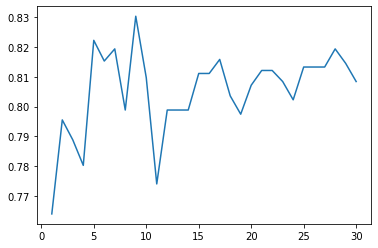

In [136]:
TRUTH_nfold=None
PREDS_nfold=None
best_md=[]
maxde=np.arange(1,31)

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in maxde:
        gbc = GradientBoostingClassifier(n_estimators=i, learning_rate=1.0, random_state=22)
        gbc.fit(X_train, y_train)
        preds = gbc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
        
    plt.plot(maxde, mcc)
    best_md.append(maxde[np.argmax(mcc)])
    plt.show()
    
n_est=round(np.mean(best_md))

#### Calculate the best learning rate

C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


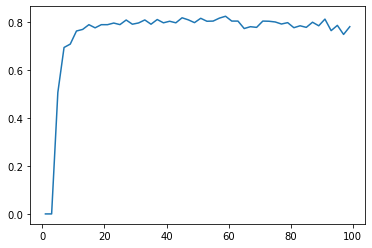

C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


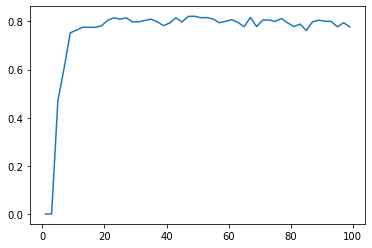

C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


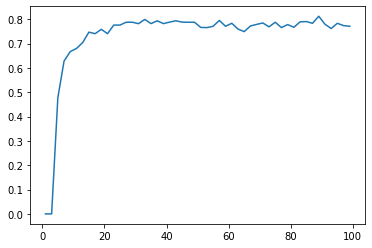

C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


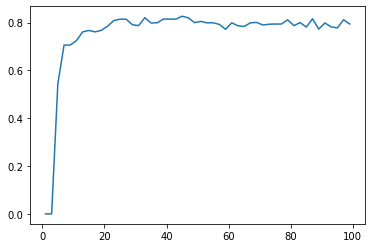

C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\jpsan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:873: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


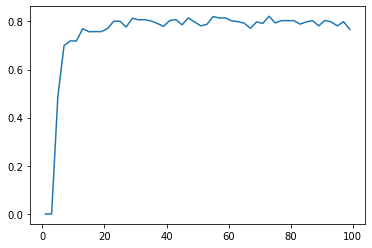

In [137]:
TRUTH_nfold=None
PREDS_nfold=None
best_md=[]
maxde=np.arange(1, 100, 2)

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in maxde:
        gbc = GradientBoostingClassifier(n_estimators=n_est, learning_rate=i/100, random_state=22)
        gbc.fit(X_train, y_train)
        preds = gbc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))

    plt.plot(maxde, mcc)
    best_md.append(maxde[np.argmax(mcc)]) 
    plt.show()

LR=np.mean(best_md)/100

#### Calculate the best max depth

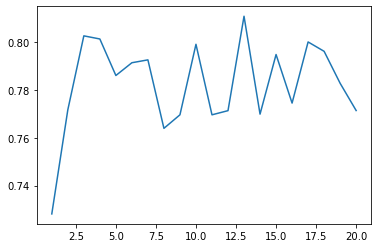

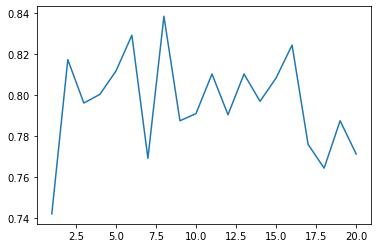

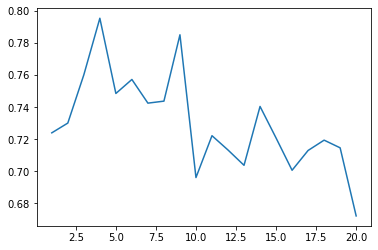

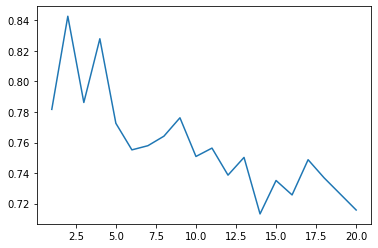

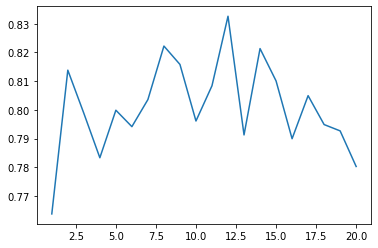

In [138]:
TRUTH_nfold=None
PREDS_nfold=None
best_md=[]
maxde=np.arange(1,21)

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    
    mcc=[]
    
    for i in maxde:
        gbc = GradientBoostingClassifier(n_estimators=n_est, learning_rate=LR, max_depth=i, random_state=22)
        gbc.fit(X_train, y_train)
        preds = gbc.predict(X_test)
        mcc.append(matthews_corrcoef(y_test, preds))
        
    plt.plot(maxde, mcc)
    best_md.append(maxde[np.argmax(mcc)])
    plt.show()

MD=np.mean(best_md)

In [139]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]

    gbc = GradientBoostingClassifier(n_estimators=n_est, learning_rate=LR, max_depth=MD, random_state=22)
    gbc.fit(X_train, y_train)
    preds_gbc = gbc.predict(X_test)
    
    if TRUTH_nfold is None:
        PREDS_nfold=preds_gbc
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_gbc))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))
    
print_results(TRUTH_nfold, PREDS_nfold)

The Precision is:  0.9578
The Recall is:  0.9692
The F1 score is:  0.9635
The Matthews correlation coefficient is:  0.7724

This is the Confusion Matrix
     0     1
0  443   122
1   88  2770


## XGB Classifier 

In [15]:
TRUTH_nfold=None
PREDS_nfold=None

for train_index, test_index in kf.split(X_total):
    
    X_train, X_test = X_total.iloc[train_index], X_total.iloc[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    

    bst = XGBClassifier(random_state=22)
    bst.fit(X_train, y_train)
    preds_bst = bst.predict(X_test)   
            
    if TRUTH_nfold is None:
        PREDS_nfold=preds_bst
        TRUTH_nfold=y_test
    else:
        PREDS_nfold=np.hstack((PREDS_nfold, preds_bst))
        TRUTH_nfold=np.hstack((TRUTH_nfold, y_test))


print_results(TRUTH_nfold, PREDS_nfold)

(3423,) [1 1 1 ... 1 0 1]


In [178]:
svm_pre = SVC(kernel='rbf', C=True_C, gamma='auto')

svm = make_pipeline(StandardScaler(), svm_pre)

svm.fit(X_total, y_total)

preds_SVM = svm.predict(X_IVS_reg)
    
print_results(y_IVS_reg, preds_SVM)

The Precision is:  0.9814
The Recall is:  0.9845
The F1 score is:  0.9830
The Matthews correlation coefficient is:  0.8874

This is the Confusion Matrix
     0    1
0  156   18
1   15  952
